<a href="https://colab.research.google.com/github/mietekdom/Data_Science_Cases/blob/master/Stock_Market_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [2]:
def fetch_financial_data(company):
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

pzu = fetch_financial_data('PZU.PL')
pkn = fetch_financial_data('PKN.PL')
ge = fetch_financial_data('GE')
co = fetch_financial_data('KO')

In [3]:
pzu.columns = ['pzu_' + col.lower() for col in pzu.columns]
pkn.columns = ['pkn_' + col.lower() for col in pkn.columns]
ge.columns = ['ge_' + col.lower() for col in ge.columns]
co.columns = ['co_' + col.lower() for col in co.columns]

In [4]:
data_all = pd.concat(objs=[pkn, pzu, ge, co], axis=1)
data_all

,pkn_open,pkn_high,pkn_low,pkn_close,pkn_volume,pzu_open,pzu_high,pzu_low,pzu_close,pzu_volume,ge_open,ge_high,ge_low,ge_close,ge_volume,co_open,co_high,co_low,co_close,co_volume
Date,,,,,,,,,,,,,,,,,,,,
2015-12-10,54.859,55.454,53.652,54.428,1284430.0,25.107,26.123,24.911,25.631,3620774.0,27.339,27.776,27.276,27.527,52426003.0,36.272,36.559,36.101,36.297,18240491.0
2015-12-11,54.773,55.808,53.928,54.592,1953553.0,25.849,26.030,24.598,24.638,3104501.0,27.230,27.489,27.076,27.175,70047129.0,36.186,36.354,35.771,35.881,20396484.0
2015-12-14,54.601,55.445,54.395,54.773,1262559.0,24.739,25.357,24.167,24.583,1958320.0,27.175,27.356,26.735,27.175,72433780.0,35.913,36.297,35.626,36.032,23668580.0
2015-12-15,55.050,55.420,54.687,54.989,981789.0,24.747,25.224,24.340,24.732,2953878.0,27.301,27.489,27.140,27.230,66080869.0,36.362,36.701,36.297,36.559,21106746.0
2015-12-16,55.205,55.626,54.601,54.989,1191797.0,24.872,25.295,24.575,25.280,1994024.0,27.356,28.047,27.320,27.823,82210805.0,36.711,37.274,36.711,37.214,25762855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,57.000,57.480,55.800,56.980,2346083.0,25.550,25.980,25.230,25.690,2767514.0,10.330,10.480,10.110,10.150,86906239.0,52.140,52.330,51.785,52.040,18969341.0
2020-12-02,57.240,57.240,55.260,56.320,1613308.0,25.700,26.550,25.400,26.450,1822399.0,10.080,10.480,10.010,10.430,77235553.0,51.900,52.130,51.635,52.110,14913072.0
2020-12-03,56.500,56.780,55.480,55.480,1464581.0,26.450,26.500,25.550,26.090,2899246.0,10.400,10.700,10.390,10.600,91452882.0,51.900,52.940,51.900,52.780,17318877.0


In [5]:
data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
pkn_open,1246.0,7.981454e+01,1.951845e+01,3.800000e+01,6.000175e+01,8.362600e+01,9.635525e+01,1.229200e+02
pkn_high,1246.0,8.091980e+01,1.970970e+01,3.897000e+01,6.065500e+01,8.459150e+01,9.772775e+01,1.229200e+02
pkn_low,1246.0,7.861275e+01,1.935014e+01,3.720000e+01,5.909225e+01,8.246900e+01,9.527350e+01,1.208600e+02
pkn_close,1246.0,7.975572e+01,1.953993e+01,3.774000e+01,5.981225e+01,8.351200e+01,9.641250e+01,1.225000e+02
pkn_volume,1246.0,1.079050e+06,6.854768e+05,1.828340e+05,6.498258e+05,9.177275e+05,1.296422e+06,7.733447e+06
pzu_open,1246.0,3.331297e+01,6.308069e+00,2.062000e+01,2.764075e+01,3.626700e+01,3.861400e+01,4.224600e+01
pzu_high,1246.0,3.367577e+01,6.337056e+00,2.079300e+01,2.791250e+01,3.677500e+01,3.894375e+01,4.242300e+01
pzu_low,1246.0,3.289787e+01,6.288349e+00,2.027000e+01,2.727475e+01,3.588250e+01,3.820150e+01,4.177200e+01
pzu_close,1246.0,3.328589e+01,6.308023e+00,2.055000e+01,2.767925e+01,3.626650e+01,3.858575e+01,4.222800e+01
pzu_volume,1246.0,2.164140e+06,1.370785e+06,3.627720e+05,1.311568e+06,1.848892e+06,2.612423e+06,1.472682e+07


In [6]:
data_all.columns

Index(['pkn_open', 'pkn_high', 'pkn_low', 'pkn_close', 'pkn_volume',
       'pzu_open', 'pzu_high', 'pzu_low', 'pzu_close', 'pzu_volume', 'ge_open',
       'ge_high', 'ge_low', 'ge_close', 'ge_volume', 'co_open', 'co_high',
       'co_low', 'co_close', 'co_volume'],
      dtype='object')

In [7]:
data_close = [col for col in data_all.columns if col.endswith('close')]
data_close

['pkn_close', 'pzu_close', 'ge_close', 'co_close']

In [8]:
x = data_all[data_close] # dane - cena zamkniecia 
x.head()

,pkn_close,pzu_close,ge_close,co_close
Date,,,,
2015-12-10,54.428,25.631,27.527,36.297
2015-12-11,54.592,24.638,27.175,35.881
2015-12-14,54.773,24.583,27.175,36.032
2015-12-15,54.989,24.732,27.230,36.559
2015-12-16,54.989,25.280,27.823,37.214


In [9]:
x_2020 = x['2020-01-01' : ] #dane od początku 2020 roku
x.head(5)

,pkn_close,pzu_close,ge_close,co_close
Date,,,,
2015-12-10,54.428,25.631,27.527,36.297
2015-12-11,54.592,24.638,27.175,35.881
2015-12-14,54.773,24.583,27.175,36.032
2015-12-15,54.989,24.732,27.230,36.559
2015-12-16,54.989,25.280,27.823,37.214


In [10]:
close_pln = x_2020.iloc[:, :2]
close_pln

,pkn_close,pzu_close
Date,,
2020-01-02,85.544,41.30
2020-01-03,84.324,40.90
2020-01-06,NaN,NaN
2020-01-07,80.960,40.51
2020-01-08,80.212,39.66
...,...,...
2020-12-01,56.980,25.69
2020-12-02,56.320,26.45
2020-12-03,55.480,26.09


In [11]:
close_usd = x_2020.iloc[:, 2:]
close_usd

,ge_close,co_close
Date,,
2020-01-02,11.88,53.170
2020-01-03,11.92,52.881
2020-01-06,12.09,52.862
2020-01-07,12.00,52.455
2020-01-08,11.89,52.551
...,...,...
2020-12-01,10.15,52.040
2020-12-02,10.43,52.110
2020-12-03,10.60,52.780


**Plots (Matplotlib Pyplot)**

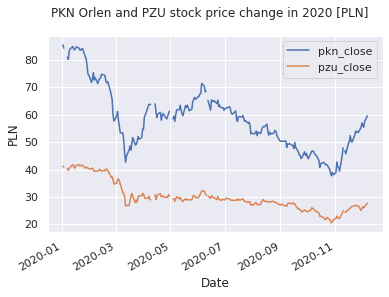

In [12]:
_ = close_pln.plot()
_ = plt.suptitle('PKN Orlen and PZU stock price change in 2020 [PLN]')
_ = plt.xlabel('Date')
_ = plt.ylabel('PLN')

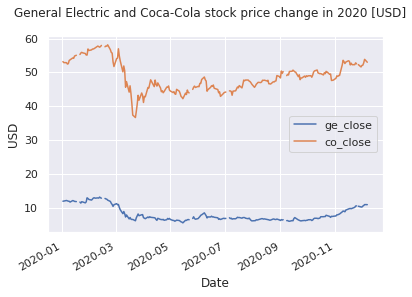

In [13]:

_ = close_usd.plot()
_ = plt.suptitle('General Electric and Coca-Cola stock price change in 2020 [USD]')
_ = plt.xlabel('Date')
_ = plt.ylabel('USD')

In [14]:
x_2020.reset_index(level=0, inplace=True)
x_2020

,Date,pkn_close,pzu_close,ge_close,co_close
0,2020-01-02,85.544,41.30,11.88,53.170
1,2020-01-03,84.324,40.90,11.92,52.881
2,2020-01-06,NaN,NaN,12.09,52.862
3,2020-01-07,80.960,40.51,12.00,52.455
4,2020-01-08,80.212,39.66,11.89,52.551
...,...,...,...,...,...
237,2020-12-01,56.980,25.69,10.15,52.040
238,2020-12-02,56.320,26.45,10.43,52.110
239,2020-12-03,55.480,26.09,10.60,52.780
240,2020-12-04,57.500,26.50,10.88,53.850


**Plots (Plotly Express)**

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.pkn_close, name='PKN Orlen'))
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.pzu_close, name='PZU'))
fig.show()

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.ge_close, name='General Electric'))
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.co_close, name='Coca-Cola'))
fig.show()

In [17]:
data_all

,pkn_open,pkn_high,pkn_low,pkn_close,pkn_volume,pzu_open,pzu_high,pzu_low,pzu_close,pzu_volume,ge_open,ge_high,ge_low,ge_close,ge_volume,co_open,co_high,co_low,co_close,co_volume
Date,,,,,,,,,,,,,,,,,,,,
2015-12-10,54.859,55.454,53.652,54.428,1284430.0,25.107,26.123,24.911,25.631,3620774.0,27.339,27.776,27.276,27.527,52426003.0,36.272,36.559,36.101,36.297,18240491.0
2015-12-11,54.773,55.808,53.928,54.592,1953553.0,25.849,26.030,24.598,24.638,3104501.0,27.230,27.489,27.076,27.175,70047129.0,36.186,36.354,35.771,35.881,20396484.0
2015-12-14,54.601,55.445,54.395,54.773,1262559.0,24.739,25.357,24.167,24.583,1958320.0,27.175,27.356,26.735,27.175,72433780.0,35.913,36.297,35.626,36.032,23668580.0
2015-12-15,55.050,55.420,54.687,54.989,981789.0,24.747,25.224,24.340,24.732,2953878.0,27.301,27.489,27.140,27.230,66080869.0,36.362,36.701,36.297,36.559,21106746.0
2015-12-16,55.205,55.626,54.601,54.989,1191797.0,24.872,25.295,24.575,25.280,1994024.0,27.356,28.047,27.320,27.823,82210805.0,36.711,37.274,36.711,37.214,25762855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,57.000,57.480,55.800,56.980,2346083.0,25.550,25.980,25.230,25.690,2767514.0,10.330,10.480,10.110,10.150,86906239.0,52.140,52.330,51.785,52.040,18969341.0
2020-12-02,57.240,57.240,55.260,56.320,1613308.0,25.700,26.550,25.400,26.450,1822399.0,10.080,10.480,10.010,10.430,77235553.0,51.900,52.130,51.635,52.110,14913072.0
2020-12-03,56.500,56.780,55.480,55.480,1464581.0,26.450,26.500,25.550,26.090,2899246.0,10.400,10.700,10.390,10.600,91452882.0,51.900,52.940,51.900,52.780,17318877.0


In [18]:
data_changed = data_all.reset_index()
data_changed

,Date,pkn_open,pkn_high,pkn_low,pkn_close,pkn_volume,pzu_open,pzu_high,pzu_low,pzu_close,pzu_volume,ge_open,ge_high,ge_low,ge_close,ge_volume,co_open,co_high,co_low,co_close,co_volume
0,2015-12-10,54.859,55.454,53.652,54.428,1284430.0,25.107,26.123,24.911,25.631,3620774.0,27.339,27.776,27.276,27.527,52426003.0,36.272,36.559,36.101,36.297,18240491.0
1,2015-12-11,54.773,55.808,53.928,54.592,1953553.0,25.849,26.030,24.598,24.638,3104501.0,27.230,27.489,27.076,27.175,70047129.0,36.186,36.354,35.771,35.881,20396484.0
2,2015-12-14,54.601,55.445,54.395,54.773,1262559.0,24.739,25.357,24.167,24.583,1958320.0,27.175,27.356,26.735,27.175,72433780.0,35.913,36.297,35.626,36.032,23668580.0
3,2015-12-15,55.050,55.420,54.687,54.989,981789.0,24.747,25.224,24.340,24.732,2953878.0,27.301,27.489,27.140,27.230,66080869.0,36.362,36.701,36.297,36.559,21106746.0
4,2015-12-16,55.205,55.626,54.601,54.989,1191797.0,24.872,25.295,24.575,25.280,1994024.0,27.356,28.047,27.320,27.823,82210805.0,36.711,37.274,36.711,37.214,25762855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,2020-12-01,57.000,57.480,55.800,56.980,2346083.0,25.550,25.980,25.230,25.690,2767514.0,10.330,10.480,10.110,10.150,86906239.0,52.140,52.330,51.785,52.040,18969341.0
1285,2020-12-02,57.240,57.240,55.260,56.320,1613308.0,25.700,26.550,25.400,26.450,1822399.0,10.080,10.480,10.010,10.430,77235553.0,51.900,52.130,51.635,52.110,14913072.0
1286,2020-12-03,56.500,56.780,55.480,55.480,1464581.0,26.450,26.500,25.550,26.090,2899246.0,10.400,10.700,10.390,10.600,91452882.0,51.900,52.940,51.900,52.780,17318877.0
1287,2020-12-04,56.420,57.600,55.680,57.500,1660774.0,26.100,26.610,26.100,26.500,1895592.0,10.670,10.930,10.510,10.880,135020902.0,52.780,53.870,52.760,53.850,18122399.0


In [19]:
fig = go.Figure(data=go.Candlestick(x=data_changed.Date, open=data_changed.ge_open, high=data_changed.ge_high, low=data_changed.ge_low, 
                                    close=data_changed.ge_close),layout=go.Layout(title_text='General Electric Company stock market'))
fig.show()

In [20]:
fig = go.Figure(data=go.Candlestick(x=data_changed.Date, open=data_changed.co_open, high=data_changed.co_high, low=data_changed.co_low, 
                                    close=data_changed.co_close),layout=go.Layout(title_text='Coca-Cola Company stock market'))
fig.show()

In [21]:
fig = go.Figure(data=go.Candlestick(x=data_changed.Date, open=data_changed.pkn_open, high=data_changed.pkn_high, low=data_changed.pkn_low, 
                                    close=data_changed.pkn_close),layout=go.Layout(title_text='Polski Koncern Naftowy Orlen Company stock market'))
fig.show()